### Welcome Trust Open-Access Funding Between 2012-2013

Data in their natural form rarely come sqeaky-clean. Often time they are passed through the 'laundary machine' that rid them of all impurities before they can be analysed and meaning insight drawn from them. The 'Laundary machine' are the various techniques employed to clean and purify the data of all impurities and dirt.

In this project we used some of those techniques.

The data set is about the open-access prices paid by the [WELCOME Trust between 2012 and 2013]('https://www.dropbox.com/s/19cjdi7wqhlfcpt/WELLCOME.zip?dl=0')

The dataset contains the following elements:
* **PMC ID/PMID**
To help the Trust identify whether a work is in PMC/Europe PMC, we ask institutions to cite the PMC ID (or the PubMed ID if a PMC ID is not known.  This data is  not always 100% accurate.
* **Publisher**
This lists the name of the publisher, as reported by the institution.  As we do not impose any name authority control on this field, you will see the same publisher listed in different ways.  For example, OUP, Oxford University Press, and O.U.P.
* **Journal name**
This lists the name of the journal (which published the Wellcome-funded work), as reported by the institution.  Again, as we not impose any name authority control on this, you will see the same journal listed in different ways.  For example, PNAS, Proceedings of the National Academy of Sciences, P.N.A.S.
Article title
This is the title of the article, as reported by the institution.
* **Cost**
The cost listed is the figure which the institution is claiming from the Wellcome Trust grant 

Our objectives are:
* Determine the five most common journals and the total articles for each
* Calculate the mean, median and standard deviation of the open-access cost per article for each journal

In [615]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [616]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [617]:
#to overcome the unicode that cant be converted we used unicode escapeunder encoding
apc_data = pd.read_csv('apcspend.csv', encoding='unicode_escape')

In [618]:
apc_data.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [619]:
apc_data.tail()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
2122,2901593,Wolters Kluwer Health,Circulation Research,Mechanistic Links Between Na+ Channel (SCN5A) ...,£1334.15
2123,3748854,Wolters Kluwer Health,AIDS,Evaluation of an empiric risk screening score ...,£1834.77
2124,3785148,Wolters Kluwer Health,Pediatr Infect Dis J,Topical umbilical cord care for prevention of ...,£1834.77
2125,PMCID:\n PMC3647051\n,Wolters Kluwer N.V./Lippinott,AIDS,Grassroots Community Organisations' Contributi...,£2374.52
2126,PMID: 23846567 (Epub July 2013),Wolters Kluwers,Journal of Acquired Immune Deficiency Syndromes,A novel community health worker tool outperfor...,£2034.75


In [620]:
apc_data.columns

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title',
       'COST (£) charged to Wellcome (inc VAT when charged)'],
      dtype='object')

In [621]:
apc_data = apc_data.rename(columns = {'PMID/PMCID':'pmid_pmcid', 'Publisher':'publisher', 'Journal title':'journal_title','Article title':'article_title', 'COST (£) charged to Wellcome (inc VAT when charged)':'cost'})

In [622]:
apc_data.head()

,pmid_pmcid,publisher,journal_title,article_title,cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [623]:
apc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
pmid_pmcid       1928 non-null object
publisher        2127 non-null object
journal_title    2126 non-null object
article_title    2127 non-null object
cost             2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


In [624]:
apc_data['pmid_pmcid']

0                                    NaN
1                             PMC3679557
2                  23043264  PMC3506128 
3                    23438330 PMC3646402
4                   23438216 PMC3601604 
5                             PMC3579457
6                             PMC3709265
7                   23057412 PMC3495574 
8                      PMCID: PMC3780468
9                      PMCID: PMC3621575
10                     PMCID: PMC3739413
11                     PMCID: PMC3530961
12                     PMCID: PMC3624797
13                            PMC3413243
14                            PMC3694353
15                            PMC3572711
16                              22610094
17                     PMCID: PMC3586974
18          23455506  PMCID: PMC3607399 
19            PMID: 24015914 PMC3833349 
20                         : PMC3805332 
21                                   NaN
22              PMCID:\n    PMC3656742\n
23                        PMCID: 3584654
24              

In [625]:
apc_data['pmid_pmcid'].unique()

array([nan, 'PMC3679557', '23043264  PMC3506128 ', ..., '3748854',
       '3785148', 'PMID: 23846567  (Epub July 2013)'], dtype=object)

In [626]:
apc_data.head()

,pmid_pmcid,publisher,journal_title,article_title,cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [627]:
#Turn the publisher column into capital letters
apc_data['publisher'] = apc_data['publisher'].str.upper()

In [628]:
# counts to know frequency
apc_data['publisher'].value_counts()

ELSEVIER                                                            391
PUBLIC LIBRARY OF SCIENCE                                           278
WILEY                                                               136
SPRINGER                                                             81
OXFORD UNIVERSITY PRESS                                              79
OUP                                                                  56
WILEY-BLACKWELL                                                      56
BIOMED CENTRAL                                                       51
NATURE PUBLISHING GROUP                                              47
ASBMB                                                                46
BMC                                                                  26
PLOS                                                                 24
NATURE                                                               24
FRONTIERS                                                       

In [629]:
#the unique shape of the publisher column
apc_data['publisher'].unique().shape

(275,)

In [630]:
#strip the data of all unnecessary spaces and new line charater
#apc_data.loc[:, 'publisher'].str.strip().unique().shape


In [631]:
#strip the data of all unnecessary spaces and new line charater and reed the publisher column off duplications and misspelling e.t.c
apc_data['publisher'] = apc_data['publisher']\
.str.replace('(^.*ACS.*$)', 'AMERICAN CHEMICAL SOCIETY')\
.str.replace('(^.*AMERICAN.SOCIETY.FOR.BIO.*$)','AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY')\
.str.replace('(^.*AMERICAN.SOC\s.*$)', 'AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY')\
.str.replace('(^.*AMERICAN\sSOCIETY\s(FOR|OF)\sMICROB.*$)', 'AMERICAN SOCIETY OF MICROBIOLOGY')\
.str.replace('\n', '')\
.str.strip()\
.str.replace('(^.*AMERICAN SOCIETY OF HA.*$)', 'AMERICAN SOCIETY OF HAEMATOLOGY')\
.str.replace('(^.*AMERICAN SOCIETY OF HE.*$)', 'AMERICAN SOCIETY OF HAEMATOLOGY')\
.str.replace('(^.*BMJ.*$)', 'BMJ GROUP')\
.str.replace('(^.*CADMUS.J.*$)', 'CADMUS JOURNAL SERVICES')\
.str.replace('(^.*CADMUS.*$)', 'CADMUS JOURNAL SERVICES')\
.str.replace('(^.*CAMDUS.*$)', 'CADMUS JOURNAL SERVICES')\
.str.replace('(^.*BIOMED.*$)', 'BIOMED CENTRAL LTD')\
.str.replace('(^.*BENTHA.*$)', 'BENTHAM SCIENCE PUBLISHERS')\
.str.replace('(^.*CAMBRIDGE.*$)', 'CAMBRIDGE UNIVERSITY PRESS')\
.str.replace('(^.*CENVEO.*$)', 'CENVEO PUBLISHER SERVICES')\
.str.replace('(^.*COLD SPRING.*$)', 'COLD SPRING HABOUR PRESS')\
.str.replace('(^.*COMPANY OF.*$)', 'COMPANY OF BIOLOGISTS')\
.str.replace('(^.*DARTMOUTH.*$)', 'DARTMOUTH JOURNAL SERVICES')\
.str.replace('(^.*DARMOUTH.*$)', 'DARTMOUTH JOURNAL SERVICES')\
.str.replace('(^.*ELSEV.*$)', 'ELSEVIER SCIENCE PUBLISHERS')\
.str.replace('(^.*FEDERATION OF AMERICAN.*$)', 'FASEB')\
.str.replace('(^.*FEDERATION OF THE AMERICAN.*$)', 'FASEB')\
.str.replace('(^.*FRONTIERS.*$)', 'FRONTIERS MEDIA')\
.str.replace('(^.*FUTURE.*$)', 'FUTURE MEDICINE')\
.str.replace('(^.*HINDAWI.*$)', 'HINDAWI PUBLISHING')\
.str.replace('(^.*IMPACT.*$)', 'IMPACT JOURNALS')\
.str.replace('(^.*INTERNATIONAL UNION OF CRY.*$)', 'INTERNATIONAL UNION OF CRYSTALLOGRAPHY')\
.str.replace('(^.*JOHN W.*$)', 'JOHN WILEY')\
.str.replace('(^.*LANDES.*$)', 'LANDES BIOSCIENCES')\
.str.replace('(^.*MARY ANN.*$)', 'MARY ANN LIEBERT')\
.str.replace('(^.*MIT PRESS.*$)', 'MIT PRESS')\
.str.replace('(^.*MY.*$)', 'MY JOVE CORPORATION')\
.str.replace('(^.*JOVE.*$)', 'MY JOVE CORPORATION')\
.str.replace('(^.*NATURE.*$)', 'NATURE PUBLISHING GROUP')\
.str.replace('(^.*NPG.*$)', 'NATURE PUBLISHING GROUP')\
.str.replace('(^.*OXFORD.*$)', 'OXFORD UNIVERSITY PRESS')\
.str.replace('(^.*OUP.*$)', 'OXFORD UNIVERSITY PRESS')\
.str.replace('(^.*PLOS.*$)', 'PLOS PUBLIC LIBRARY OF SCIENCE')\
.str.replace('(^.*PNAS.*$)', 'PNAS')\
.str.replace('(^.*PORTLAND.*$)', 'PORTLAND PRESS')\
.str.replace('(^.*PUBMED.*$)', 'PUBMED')\
.str.replace('(^.*ROYAL SOCIETY.*$)', 'ROYAL SOCIETY OF CHEMISTRY')\
.str.replace('(^.*RSC.*$)', 'ROYAL SOCIETY OF CHEMISTRY')\
.str.replace('(^.*SAGE.*$)', 'SAGE PUBLICATIONS')\
.str.replace('(^.*SOCIETY FOR GENE.*$)', 'SOCIETY FOR GENERAL MICROBIOLOGY')\
.str.replace('(^.*SOCIETY FOR LEUKO.*$)', 'SOCIETY OF LEUKOCYTE BIOLOGY')\
.str.replace('(^.*SOCIETY FOR NEURO.*$)', 'SOCIETY OF NEURO SCIENCES')\
.str.replace('(^.*SOCIETY OF NEUROSCIENCE.*$)', 'SOCIETY OF NEURO SCIENCES')\
.str.replace('(^.*SOCIETY OF GENE.*$)', 'SOCIETY FOR GENERAL MICROBIOLOGY')\
.str.replace('(^.*SPRINGER.*$)', 'SPRINGER')\
.str.replace('(^.*TAYLOR.*$)', 'TAYLOR AND FRANCIS')\
.str.replace('(^.*T&F.*$)', 'TAYLOR AND FRANCIS')\
.str.replace('(^.*THE ENDOCRINE SOC.*$)', 'THE ENDOCRINE SOCIETY')\
.str.replace('(^.*THE END.*$)', 'THE ENDOCRINE SOCIETY')\
.str.replace('(^.*WILEY.*$)', 'WILEY BLACKWELL')\
.str.replace('(^.*WLIEY.*$)', 'WILEY BLACKWELL')\
.str.replace('(^.*WOLTERS KLU.*$)', 'WOLTERS KLUWER')\
.str.replace('(^.*ASM.*$)', 'AMERICAN SOCIETY OF MICROBIOLOGY')\
.str.replace('(^.*ASBMB.*$)', 'AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY')\
.str.replace('(^.*AMBSB.*$)', 'AMERICAN SOCIETY FOR BIOCHEMISTRY AND MOLECULAR BIOLOGY')\
.str.replace('(^.*CUP.*$)', 'CENVEO PUBLISHER SERVICES')



In [632]:
apc_data.head()

,pmid_pmcid,publisher,journal_title,article_title,cost
0,NaN,CENVEO PUBLISHER SERVICES,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,AMERICAN CHEMICAL SOCIETY,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,AMERICAN CHEMICAL SOCIETY,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,AMERICAN CHEMICAL SOCIETY,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,AMERICAN CHEMICAL SOCIETY,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [633]:
#clean the journal title column
apc_data['journal_title'].value_counts().head()

PLoS One                                           92
PLoS ONE                                           62
Journal of Biological Chemistry                    48
Nucleic Acids Research                             21
Proceedings of the National Academy of Sciences    19
Name: journal_title, dtype: int64

In [634]:
#count the row of journal title before cleaning
apc_data['journal_title'].unique().shape

(985,)

In [635]:
#clean the journal title column
apc_data['journal_title'] = apc_data['journal_title']\
.str.upper()\
.str.strip()\
.str.replace('(^.*J MED CH.*$)', 'JOURNAL OF MEDICINAL CHEMISTRY')\
.str.replace('(^.*ANTIMICROBIAL AG.*$)', 'ANTIMICROBIAL AGENTS AND CHEMOTHERAPY')\
.str.replace('(^.*JOUNRAL.*$)', 'JOURNAL OF CLINICAL MICROBIOLOGY')\
.str.replace('(^.*J BIOL CHE.*$)', 'JOURNAL OF BIOLOGICAL CHEMISTRY')\
.str.replace('(^.*THE JOURNAL OF BIOLOGICAL.*$)', 'JOURNAL OF BIOLOGICAL CHEMISTRY')\
.str.replace('(^.*BIOLOGICAL CHEMISTRY.*$)', 'JOURNAL OF BIOLOGICAL CHEMISTRY')\
.str.replace('(^.*BIOLOGICIAL CHEMISTRY.*$)', 'JOURNAL OF BIOLOGICAL CHEMISTRY')\
.str.replace('(^.*JOURNAL OF BIOL CHEM.*$)', 'JOURNAL OF BIOLOGICAL CHEMISTRY')\
.str.replace('(^.*MOLECULAR PA.*$)', 'MOLECULAR BRAIN')\
.str.replace('(^.*INTERNATIONAL JOURNAL OF BEHAVI.*$)', 'INTERNATIONAL JOURNAL OF BEHAVIOURAL NUTRITION AND PHYSICAL ACTIVITY')\
.str.replace('(^.*BJOPHTHALMOL.*$)', 'BRITISH JOURNAL OF OPHTHALMOLOGY')\
.str.replace('(^.*BRITISH JOURNAL OF OP.*$)', 'BRITISH JOURNAL OF OPTHALMOLOGY')\
.str.replace('(^.*JOURNAL OF NEUROLOGY, NEUROSURGERY.*$)', 'JOURNAL OF NEUROLOGY, NEUROSURGERY AND PSYCHIATRY')\
.str.replace('(^.*BRITISH JOURNAL FOR THE HISTORY OF SCIENCE.*$)', 'BRITISH JOURNAL OF THE HISTORY OF SCIENCE')\
.str.replace('(^.*TRENDS IN NEUROSCIE.*$)', 'TRENDS IN NEUROSCIENCES')\
.str.replace('(^.*THE FASEB JOU.*$)', 'FASEB JOURNAL')\
.str.replace('(^.*JOURNAL OF VISUALIZED EXPER.*$)', 'JOURNAL OF VISUALIZED EXPERIMENTS')\
.str.replace('(^.*PNAS.*$)', 'PROCEDDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF USA')\
.str.replace('(^.*PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE UNITED STATES.*$)', 'PROCEDDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF USA')\
.str.replace('(^.*INTERNATIONAL JOURAL OF EPIDE.*$)', 'INTERNATIONAL JOURNAL OF EPIDEMIOLOGY')\
.str.replace('(^.*NEPHROLOGY DIALYSIS TRANS.*$)', 'NEPHROLOGY DIALYSIS AND TRANSPLANTATION')\
.str.replace('(^.*OXFORD UNIVERSITY P.*$)', 'OXFORD JOURNALS')\
.str.replace('(^.*J INFECT D.*$)', 'THE JOURNAL OF INFECTIOUS DISEASES')\
.str.replace('(^.*JAIDS JOURNAL OF ACQ.*$)', 'JOURNAL OF AIDS')\
.str.replace('(^.*JOURNAL OF ACQUIRED IM.*$)', 'JOURNAL OF AIDS')\
.str.replace('(^.*AIDS JOUR.*$)', 'JOURNAL OF AIDS')



In [636]:
apc_data['journal_title'].head()

0            PSYCHOLOGICAL MEDICINE
1                 BIOMACROMOLECULES
2    JOURNAL OF MEDICINAL CHEMISTRY
3    JOURNAL OF MEDICINAL CHEMISTRY
4                        J ORG CHEM
Name: journal_title, dtype: object

In [637]:
apc_data['journal_title'].value_counts().sort_index()

ACADEMY OF NUTRITION AND DIETETICS                                                         1
ACS CHEMICAL BIOLOGY                                                                       5
ACS CHEMICAL NEUROSCIENCE                                                                  1
ACS NANO                                                                                   2
ACTA CRYSTALLOGRAPHICA SECTION D,  BIOLOGICAL CRYSTALLOGRAPHY                              1
ACTA CRYSTALLOGRAPHICA SECTION D: BIOLOGICAL CRYSTALLOGRAPHY                               1
ACTA CRYSTALLOGRAPHICA SECTION F: STRUCTURAL BIOLOGY AND CRYSTALLIZATION COMMUNICATIONS    2
ACTA CRYSTALLOGRAPHICA, SECTION D                                                          1
ACTA CRYSTALLOGRAPHY D                                                                     1
ACTA D                                                                                     1
ACTA DERMATO VENEREOLOGICA                                            

In [638]:
#clean the pmid_pmcid column
apc_data['pmid_pmcid'] = apc_data['pmid_pmcid'].str.replace('\D{7}', '').str.replace('PMID: ', '')\
.str.replace('PMC', '').str.replace(':', '').str.replace('PMID', '').str.replace('\n', '')\
.str.replace('Epub', 'NaN').str.strip()

In [639]:
apc_data.isnull().sum()

pmid_pmcid       199
publisher          0
journal_title      1
article_title      0
cost               0
dtype: int64

In [640]:
apc_data.fillna(method='bfill', inplace=True)

In [641]:
apc_data.isnull().sum()

pmid_pmcid       0
publisher        0
journal_title    0
article_title    0
cost             0
dtype: int64

In [642]:
apc_data.tail()

,pmid_pmcid,publisher,journal_title,article_title,cost
2122,2901593,WOLTERS KLUWER,CIRCULATION RESEARCH,Mechanistic Links Between Na+ Channel (SCN5A) ...,£1334.15
2123,3748854,WOLTERS KLUWER,AIDS,Evaluation of an empiric risk screening score ...,£1834.77
2124,3785148,WOLTERS KLUWER,PEDIATR INFECT DIS J,Topical umbilical cord care for prevention of ...,£1834.77
2125,3647051,WOLTERS KLUWER,AIDS,Grassroots Community Organisations' Contributi...,£2374.52
2126,23846567 July 2013),WOLTERS KLUWER,JOURNAL OF AIDS,A novel community health worker tool outperfor...,£2034.75


In [643]:
#clean the cost column and change to the appropriate data type
apc_data['cost'] = apc_data['cost'].str.replace('£','')\
.str.replace('$', '')\
.astype(float)

In [644]:
apc_data['cost'].unique()

array([   0.  , 2381.04,  642.56, ..., 2015.72, 1334.15, 2034.75])

In [645]:
apc_data['cost'].value_counts().sort_index()

0.00          1
9.93          1
45.94         1
122.31        1
135.29        1
159.74        1
159.91        1
187.03        1
206.32        1
214.74        1
238.08        1
265.67        1
270.00        1
321.12        1
321.46        1
327.72        1
329.79        1
340.00        1
343.51        1
346.25        1
348.33        1
364.17        1
378.70        1
378.78        1
381.04        1
384.00        1
389.73        1
395.60        1
402.42        1
409.78        1
             ..
3975.75       1
3992.37       1
3995.74       1
3997.71       1
4002.42       1
4012.03       1
4041.05       1
4069.66       1
4072.42       1
4076.38       1
4077.52       1
4084.51       1
4095.97       1
4099.71       1
4105.34       1
4112.54       1
4148.39       1
4151.77       1
4163.88       1
4170.35       1
4226.04       1
4320.00       2
4554.01       1
4800.00       3
5760.00       1
6000.00       1
13200.00      1
192645.00     1
201024.00     1
999999.00    47
Name: cost, Length: 1395

In [646]:
#removing outliers
apc_data = apc_data[apc_data['cost'].between(9.93,202000.00)]

In [647]:
apc_data['cost'].describe()

count      2079.000000
mean       2016.007273
std        6101.730446
min           9.930000
25%        1270.780000
50%        1853.000000
75%        2302.930000
max      201024.000000
Name: cost, dtype: float64

In [648]:
apc_data['cost'].unique()

array([2381.04,  642.56,  669.64, ..., 2015.72, 1334.15, 2034.75])

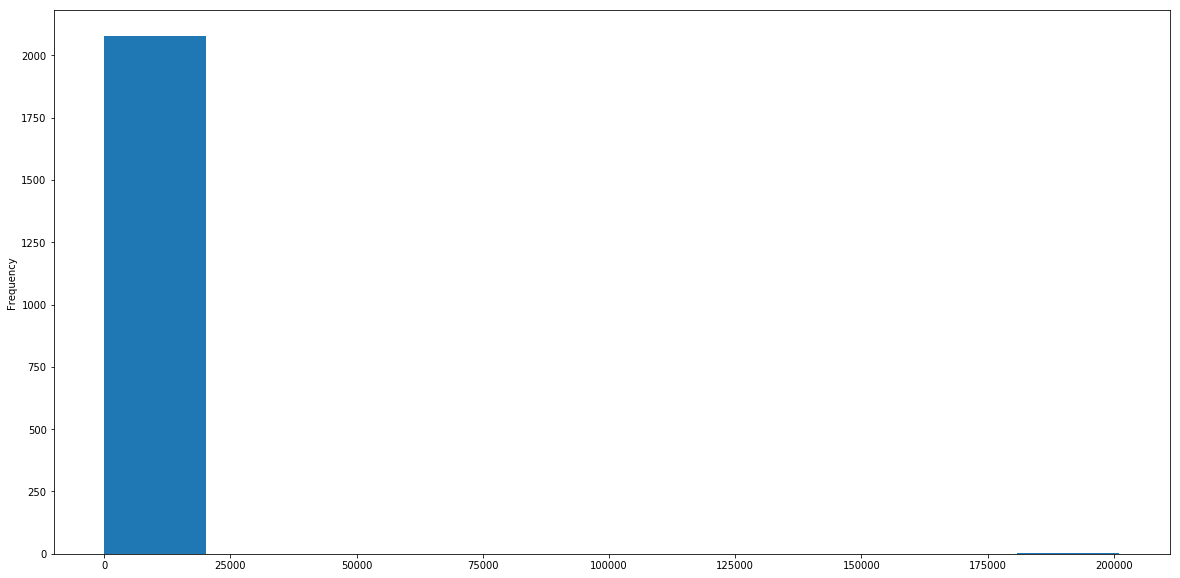

In [649]:
apc_data['cost'].plot(kind='hist')

### Determine the five most common journals and their respective number of  articles

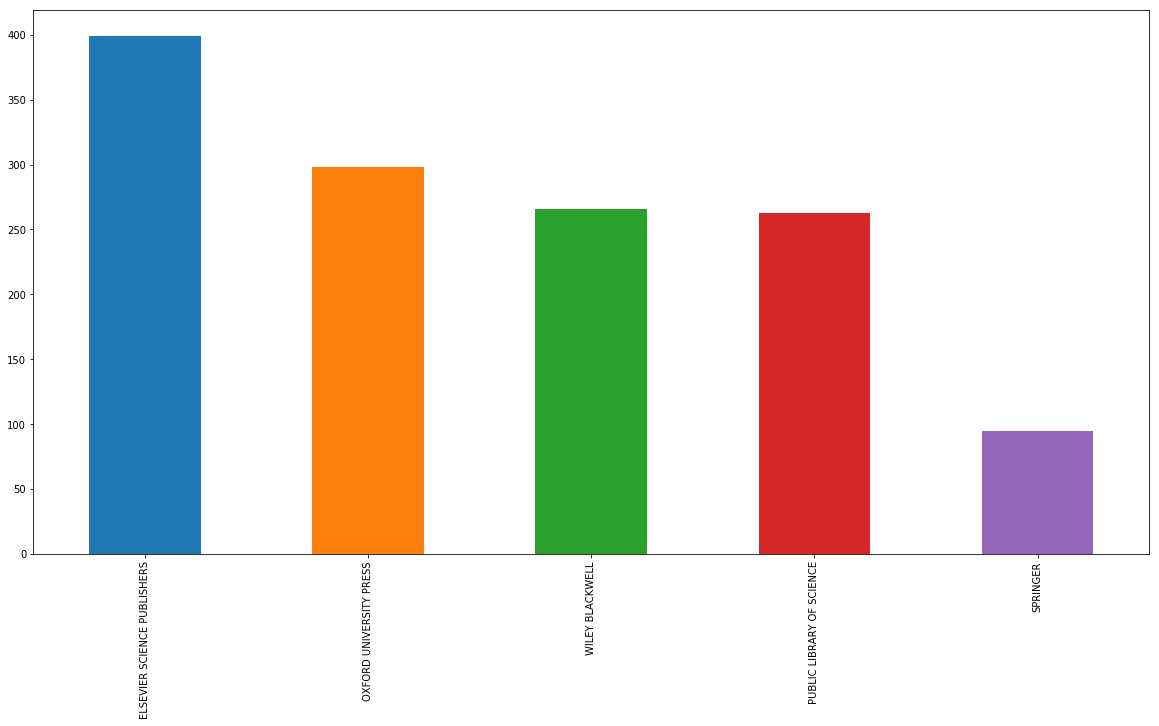

In [650]:
#the five most common journal by publisher
apc_data['publisher'].value_counts(sort=True).head().plot(kind='bar')

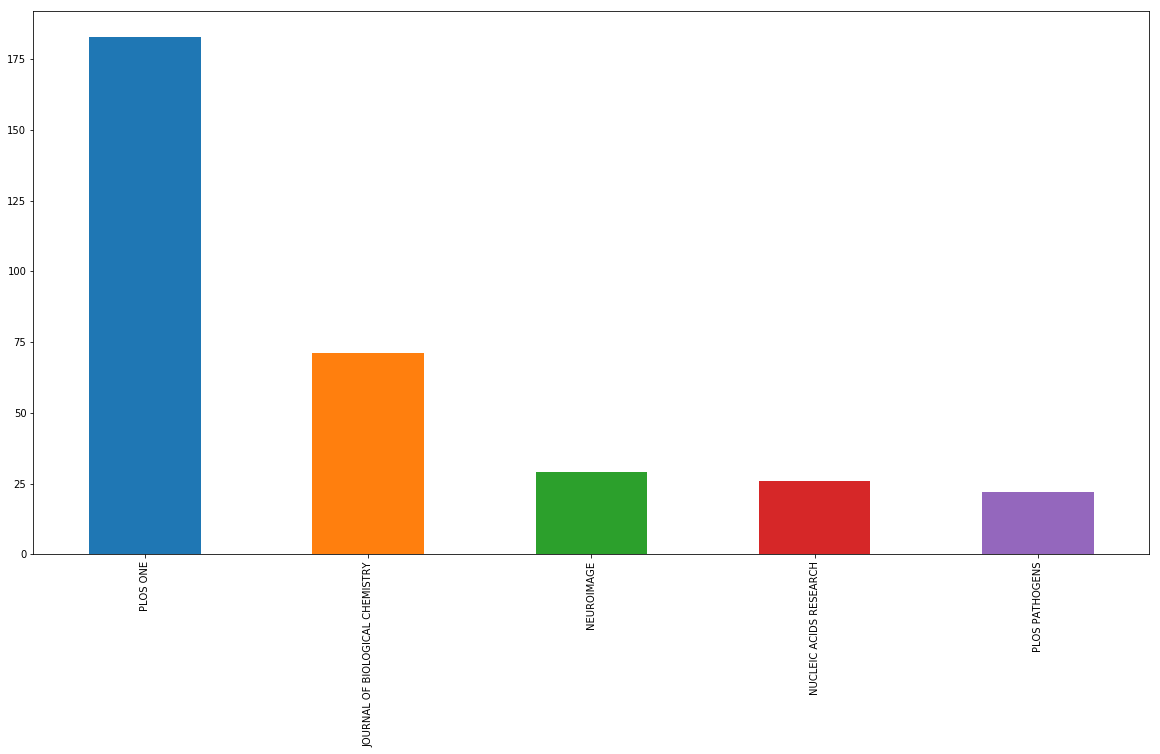

In [651]:
#the five most common journals by journal title
apc_data['journal_title'].value_counts(sort=True).head().plot(kind='bar');


## Calculate the mean, median, and standard deviation of the open-access cost per article for each journal

### The mean, median and standard deviation per article for Plos_One Journal

In [652]:
article_plos_one = apc_data[apc_data.journal_title=='PLOS ONE']

In [653]:
print(article_plos_one.cost.mean())
print(article_plos_one.cost.median())
print(article_plos_one.cost.std())

1982.2533333333326
896.99
14173.065921944693


### The mean, median and standard deviation per article for Journal Of Biological Chemistry

In [654]:
article_jbc = apc_data[apc_data.journal_title=='JOURNAL OF BIOLOGICAL CHEMISTRY']

In [655]:
print(article_jbc.cost.mean())
print(article_jbc.cost.median())
print(article_jbc.cost.std())

1378.1404225352114
1311.73
388.5539113373242


### The mean, median and standard deviation per article for Journal Of Neuro Image

In [656]:
article_neuro = apc_data[apc_data.journal_title=='NEUROIMAGE']

In [657]:
print(article_neuro.cost.mean())
print(article_neuro.cost.median())
print(article_neuro.cost.std())

2215.168275862069
2326.43
266.65394691928987


### The mean, median and standard deviation per article for Journal Of Plos Pathogens

In [658]:
article_pathogen = apc_data[apc_data.journal_title=='PLOS PATHOGENS']

In [659]:
print(article_pathogen.cost.mean())
print(article_pathogen.cost.median())
print(article_pathogen.cost.std())

1572.8668181818182
1600.25
161.78089066583865


### The mean, median and standard deviation per article for Journal Of Nucleic acids Research

In [660]:
article_nucleic = apc_data[apc_data.journal_title=='NUCLEIC ACIDS RESEARCH']

In [661]:
print(article_nucleic.cost.mean())
print(article_nucleic.cost.median())
print(article_nucleic.cost.std())

1149.0
852.0
442.9404474644419


In [662]:
apc_data.describe()

,cost
count,2079.000000
mean,2016.007273
std,6101.730446
min,9.930000
25%,1270.780000
50%,1853.000000
75%,2302.930000
max,201024.000000
